In [ ]:
import time
from datetime import datetime

def human_to_unix(human_time):
    try:
        return int(time.mktime(datetime.strptime(human_time, "%Y-%m-%d %H:%M").timetuple()))
    except ValueError:
        print("Invalid format. Please use 'YYYY-MM-DD HH:MM'.")
        return None

def generate_link():
    token_address = "tokenaddres"
    start_time = "2024-12-20 23:00"
    end_time = "2024-12-20 23:00"

    start_unix = human_to_unix(start_time)
    end_unix = human_to_unix(end_time)

    if start_unix is None or end_unix is None:
        print("Could not generate the link due to invalid input.")
        return

    if start_unix >= end_unix:
        print("Start time must be before end time.")
        return

    link = f"https://gmgn.ai/api/v1/token_kline/sol/{token_address}?resolution=1s&from={start_unix}&to={end_unix}"
    print("Generated Link:")
    print(link)

if __name__ == "__main__":
    generate_link()


Generated Link:
https://gmgn.ai/api/v1/token_kline/sol/DbgoUbcpxXqRXQPBG8fJY8r9WLRM45JLi5CApsWFpump?resolution=1s&from=1734720900&to=1734722700


{'code': 0, 'reason': '', 'message': 'success', 'data': {'list': [{'open': '0.000005512107307745', 'high': '0.000030495527983915', 'low': '0.000005512107307745', 'close': '0.000030495527983915', 'volume': '7991.0012787517', 'time': '1734721414000'}, {'open': '0.000030495527983915', 'high': '0.000031358400141877', 'low': '0.000030495527983915', 'close': '0.000031358400141877', 'volume': '196.07855208249', 'time': '1734721415000'}, {'open': '0.000031358400141877', 'high': '0.000031358400141877', 'low': '0.000031358400141877', 'close': '0.000031358400141877', 'volume': '0', 'time': '1734721416000'}, {'open': '0.000031358400141877', 'high': '0.000031358400141877', 'low': '0.000031358400141877', 'close': '0.000031358400141877', 'volume': '0', 'time': '1734721417000'}, {'open': '0.000031358400141877', 'high': '0.000031358400141877', 'low': '0.000031358400141877', 'close': '0.000031358400141877', 'volume': '0', 'time': '1734721418000'}, {'open': '0.000031358400141877', 'high': '0.000031358400

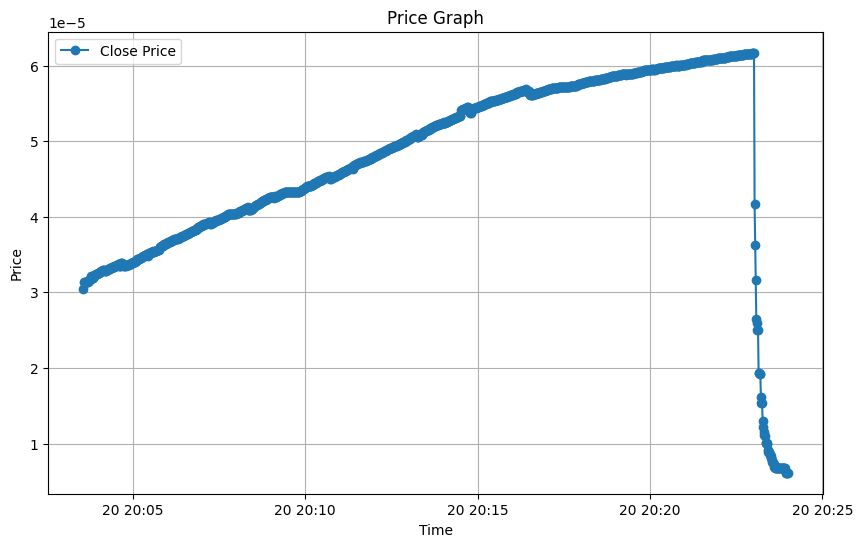

In [32]:
import json
import matplotlib.pyplot as plt
from datetime import datetime

# Load JSON data from a file
with open('data2.json', 'r') as file:
    data = json.load(file)

print(data)

# Extract time and close prices
timestamps = [int(item['time']) for item in data['data']['list']]
close_prices = [float(item['close']) for item in data['data']['list']]

# Convert timestamps to human-readable format
dates = [datetime.fromtimestamp(ts / 1000) for ts in timestamps]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(dates, close_prices, marker='o', label='Close Price')
plt.title('Price Graph')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()